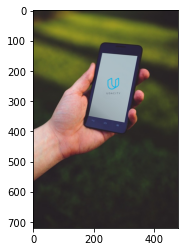

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('1_2_Convolutional_Filters_Edge_Detection/images/phone.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB ( from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

### Perform edge detection

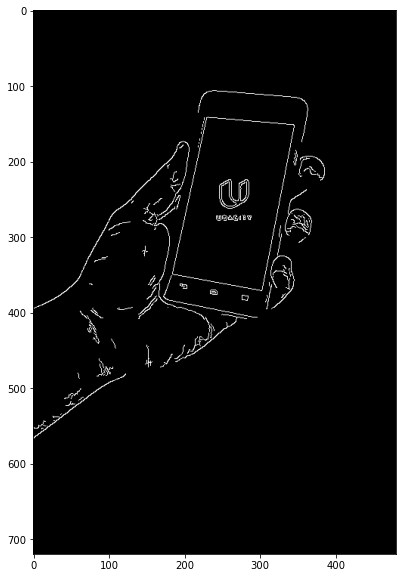

In [11]:
#Convert image to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# Define our parameters for Canny
low_threshold = 50
high_threshold = 100
edges = cv2.Canny(gray, low_threshold, high_threshold)

f, ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(edges, cmap='gray')

### Find lines using a Hough transform

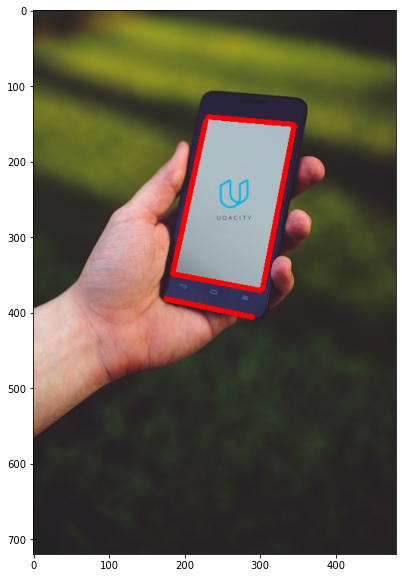

In [27]:
# Define the Hough trasnform parameters
rho = 1
theta = np.pi/180
threshold = 80
min_line_length = 100
max_line_gap = 5

# Find lines using Hough transform
lines = cv2.HoughLinesP(edges
                       ,rho
                       ,theta
                       ,threshold
                       ,np.array([])
                       ,min_line_length
                       ,max_line_gap)

line_image = np.copy(image_copy)

# Iterate over the output lines and draw them on the image copy
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)

f, ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(line_image)